# First stroll with ggplot

The goal of this exercise is to learn how to access the ggplot2 R package in Python. The ggplot2 package is similar to seaborn in that both provide wrappers to matplotlib that let you use concise, high-level commands to build complex plots quickly. 

Documentation (pretty sparse)
* http://ggplot.yhathq.com/how-it-works.html 
* http://ggplot.yhathq.com/docs/index.html

###Philosophy
Build a plot step by step, adding elements incrementally like you would in a transformation pipeline:
  1. Build a plot container, connecting to the data (pandas.DataFrame) to be plotted.
  2. Build an aesthetic object that describes which columns to use in each dimension of the desired plot.
  3. Apply one ore more renderers.
  4. [OPTIONAL] Apply scalers to contol the color codes, or the scaling along the x and y axis.
  5. [OPTIONAL] Apply a facet layer to build multiple plots based on grouping data by

In [1]:
%matplotlib inline
import numpy as np

In [2]:
# Main plotting functionality
from ggplot import ggplot, geom_line, ggsave

In [3]:
# Import data management tools and sample data
from ggplot import aes, meat, diamonds
meat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 827 entries, 0 to 826
Data columns (total 8 columns):
date               827 non-null datetime64[ns]
beef               827 non-null float64
veal               827 non-null float64
pork               827 non-null float64
lamb_and_mutton    827 non-null float64
broilers           635 non-null float64
other_chicken      143 non-null float64
turkey             635 non-null float64
dtypes: datetime64[ns](1), float64(7)
memory usage: 58.1 KB


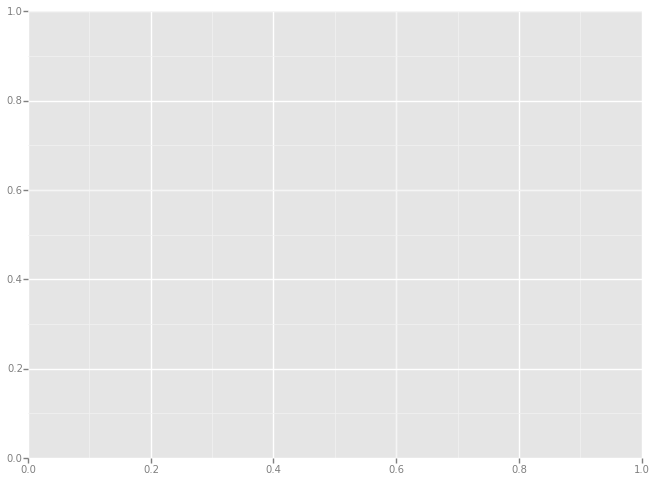

<ggplot: (291541081)>

In [4]:
# Create a plot container and connect to some data
ggplot(meat, aes(x='date', y='beef'))

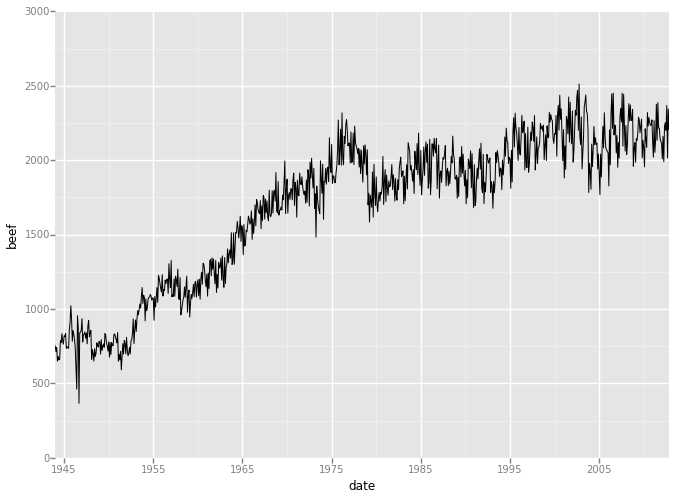

<ggplot: (274272161)>

In [5]:
# "Add" to your plot with the + operator:
ggplot(meat, aes(x='date', y='beef')) + geom_line()

##Save plot to file

In [6]:
plot = ggplot(meat, aes(x='date', y='beef')) + geom_line()
ggsave(plot, "test.jpg")
%pwd

Saving 11.0 x 8.0 in image.


u'/Users/jrocher/Projects/class-material/demo/visual_exploration'

## Other geometries for timeseries

In [7]:
# Plot styles
from ggplot.geoms import *

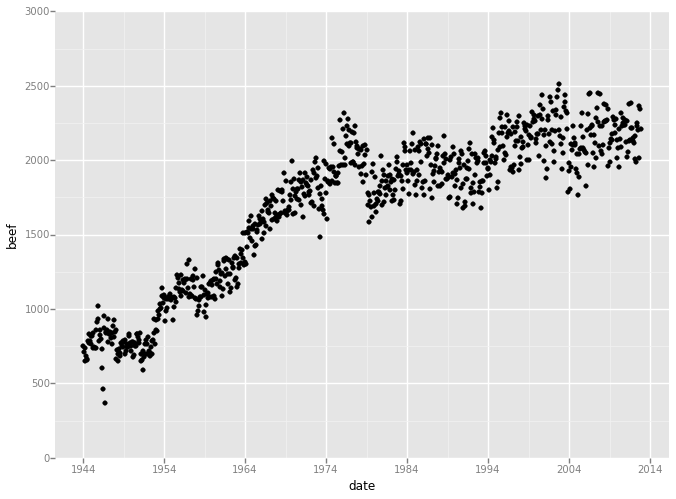

<ggplot: (289247665)>

In [8]:
ggplot(meat, aes(x='date', y='beef')) + geom_point()

In [9]:
# Documentation?
geom_point?

In [10]:
# Documentation!
geom_point??

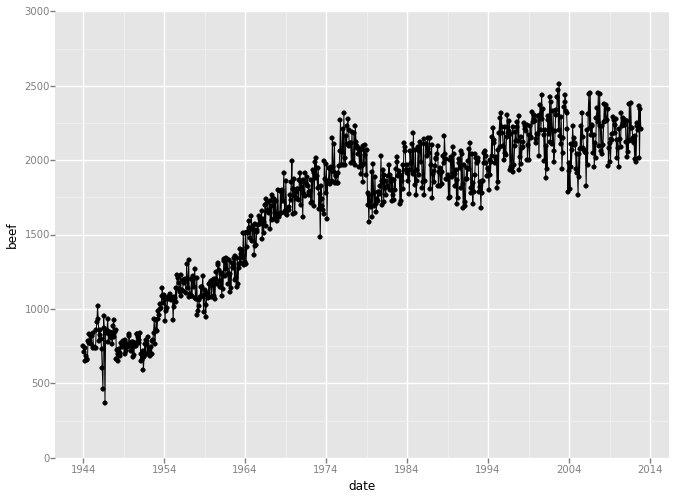

<ggplot: (289488893)>

In [11]:
# Multiple renderers
ggplot(meat, aes(x='date', y='beef')) + geom_point() + geom_line()

## More customizations

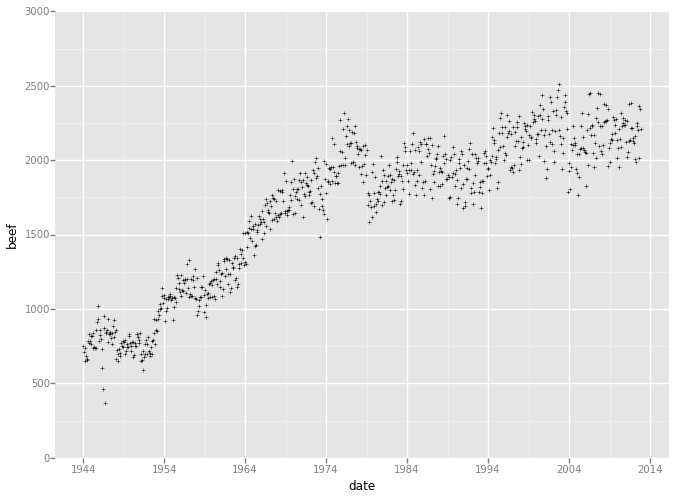

<ggplot: (289191953)>

In [12]:
ggplot(meat, aes(x='date', y='beef')) + geom_point(shape="+")

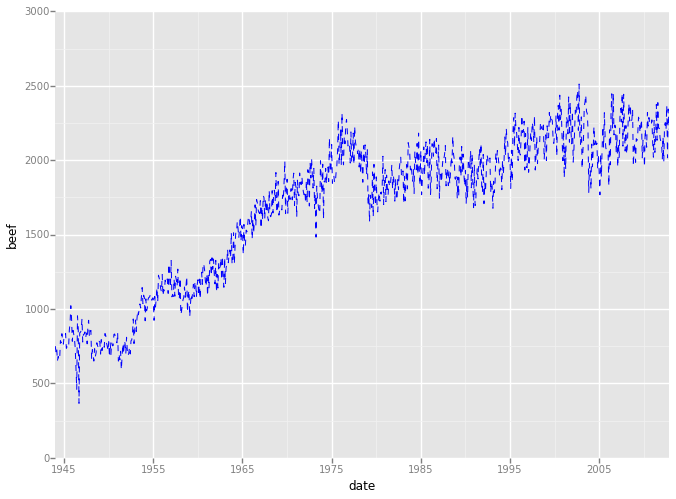

<ggplot: (289488201)>

In [13]:
ggplot(meat, aes(x='date', y='beef')) + geom_line(linetype="--", color="blue")

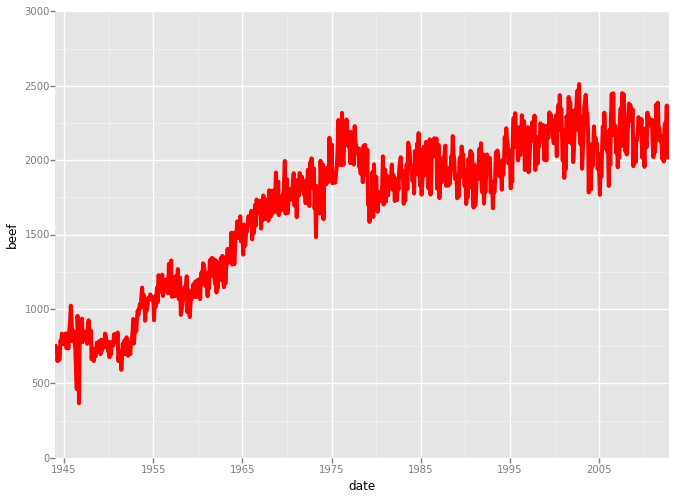

<ggplot: (289935073)>

In [14]:
ggplot(meat, aes(x='date', y='beef')) + geom_line(size=4, color="red")

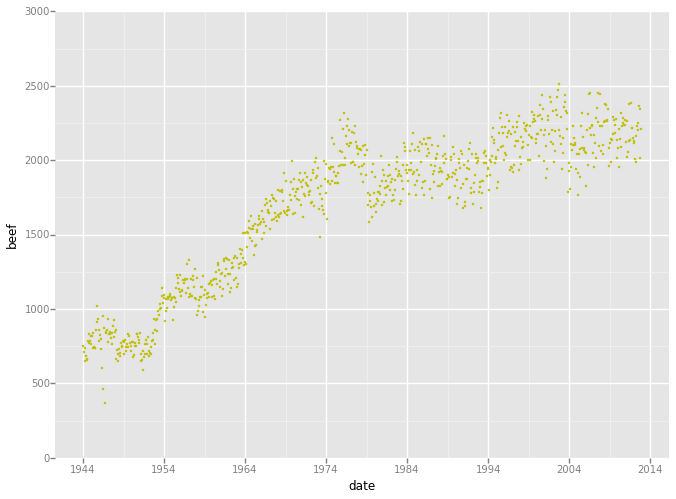

<ggplot: (289635629)>

In [15]:
ggplot(meat, aes(x='date', y='beef')) + geom_point(size=4, color="y")

## Geometries for 1 parameter visualization

In [16]:
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58,335,4.34,4.35,2.75


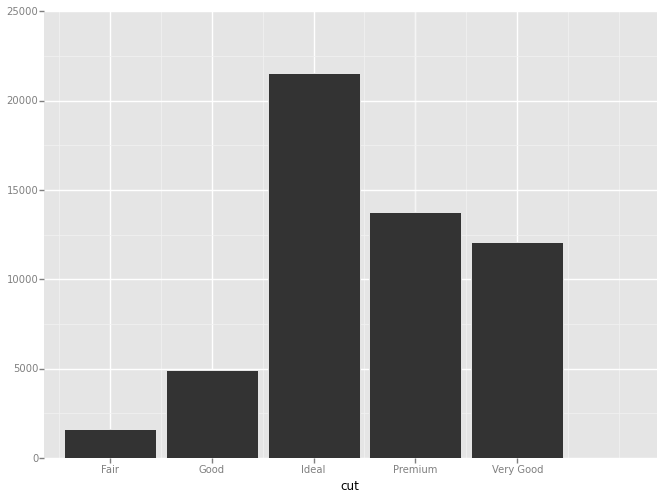

<ggplot: (289165369)>

In [17]:
ggplot(diamonds, aes(x="cut")) + geom_bar()

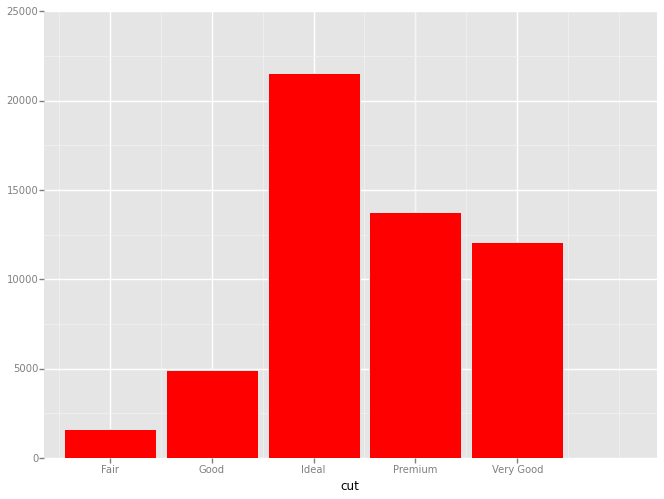

<ggplot: (289547473)>

In [18]:
ggplot(diamonds, aes(x="cut")) + geom_bar(fill="red")

/Users/jrocher/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/ggplot/geoms/geom_bar.py:47: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  _reset = self.bottom == None or (self.ax != None and self.ax != ax)


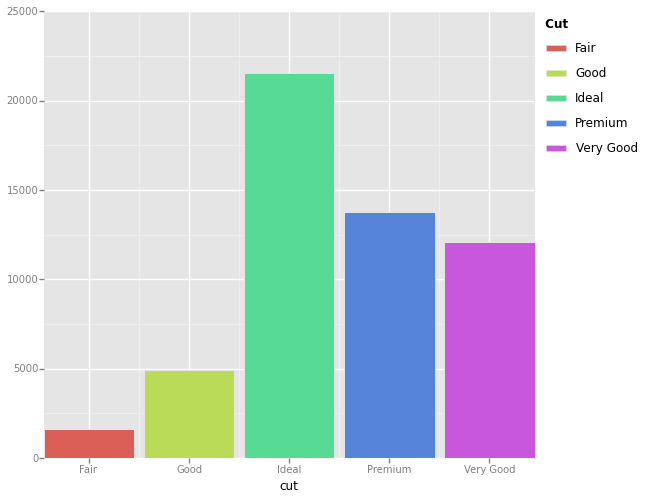

<ggplot: (289081297)>

In [19]:
ggplot(diamonds, aes(x="cut", fill="cut")) + geom_bar()

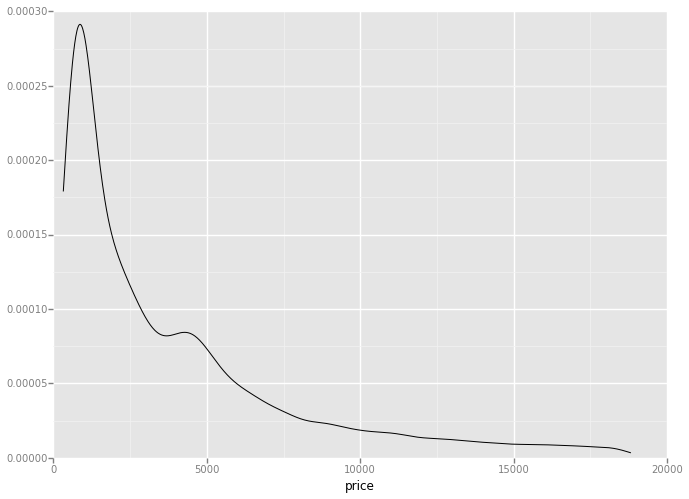

<ggplot: (289251433)>

In [20]:
ggplot(diamonds, aes(x="price")) + geom_density()

## Implicit "Group-By" operations

###Implicit group-by on the "cut" type

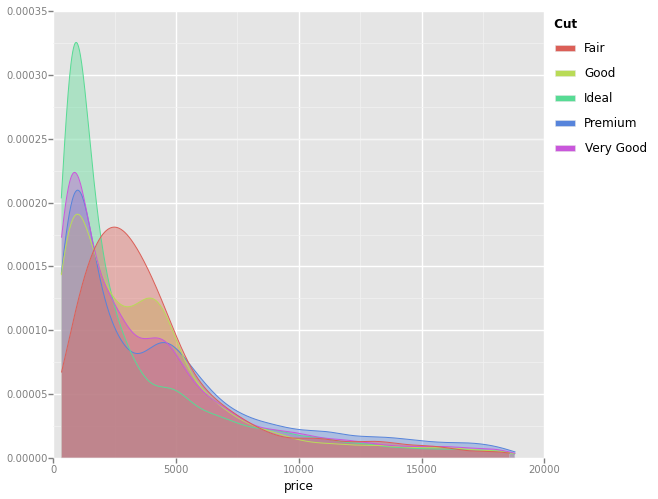

<ggplot: (289811577)>

In [21]:
ggplot(diamonds, aes(x="price", color="cut", fill='cut')) + geom_density(alpha=0.4)

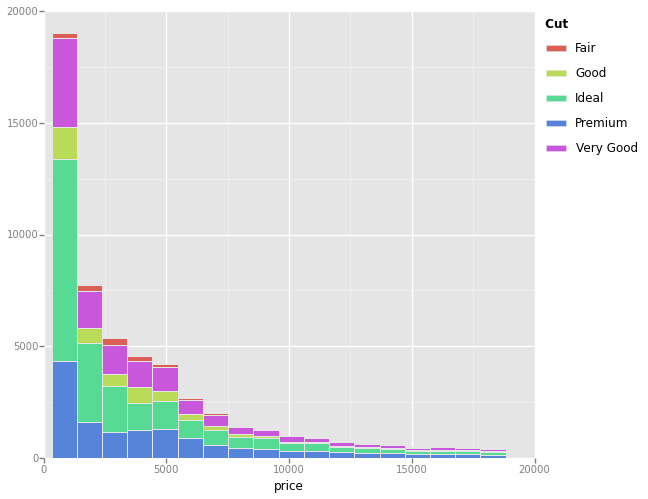

<ggplot: (289485913)>

In [22]:
# See also geom_histogram
ggplot(diamonds, aes(x="price", fill="cut"))  + geom_bar(binwidth=1000)

###Implicit group-by operations can be done in x-y plots as well...

In [23]:
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58,335,4.34,4.35,2.75


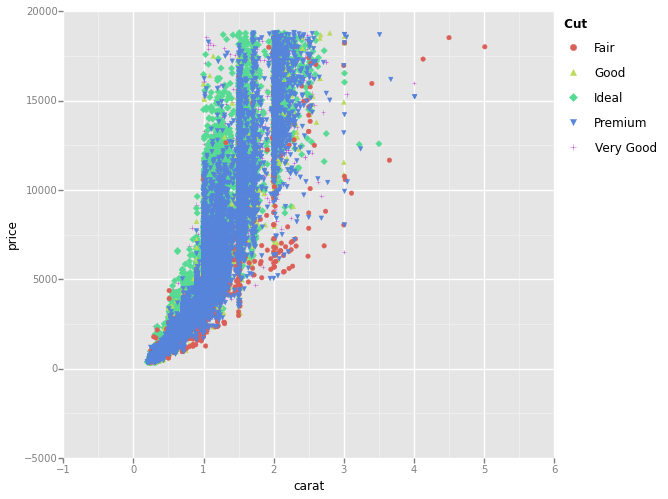

<ggplot: (291942185)>

In [24]:
# Since there is a 'shape' key-word in geom_point, it can be set to a variable in the AES
ggplot(aes(x="carat", y="price", shape="cut", color="cut"), data=diamonds) + geom_point()

## Data analysis tools

In [25]:
from ggplot.stats import stat_summary

In [26]:
stat_summary??

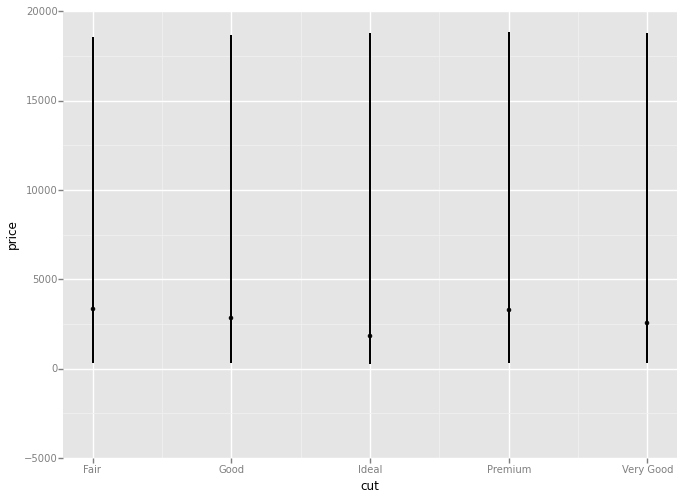

<ggplot: (289700105)>

In [27]:
ggplot(aes(x='cut', y='price'), data=diamonds.iloc[::10, :]) \
            + stat_summary(fun_y=np.median, fun_ymin=np.min, fun_ymax=np.max)

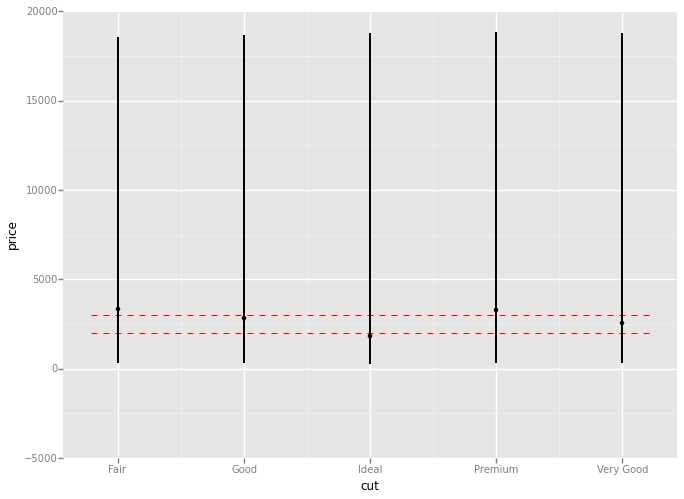

<ggplot: (294118117)>

In [28]:
# Help read the plot with arbitrary lines:
# See also geom_abline and stat_function 
ggplot(aes(x='cut', y='price'), data=diamonds.iloc[::10, :]) \
            + stat_summary(fun_y=np.median, fun_ymin=np.min, fun_ymax=np.max)\
            + geom_hline(yintercept=[2000, 3000], color="red", linetype="--")

In [29]:
from ggplot.stats import stat_smooth
stat_smooth??

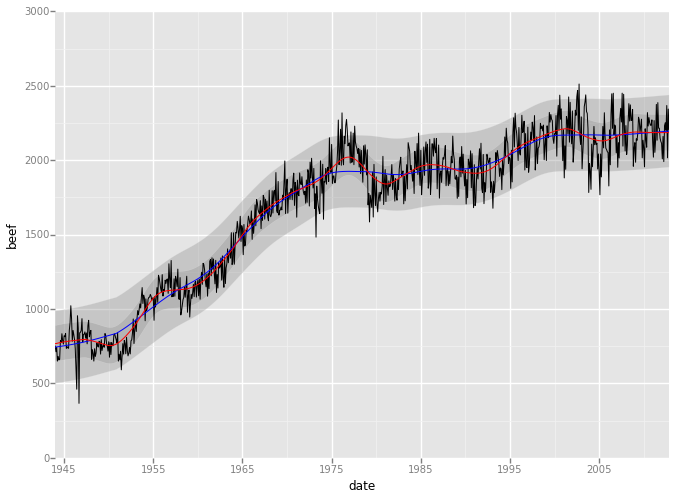

<ggplot: (291952609)>

In [30]:
# statsmodel's LOWESS: LOcally WEighted Scatterplot Smoothing
ggplot(meat, aes(x='date', y='beef')) + geom_line() +\
    stat_smooth(color='blue', span=0.2) + stat_smooth(color='red', span=0.1)

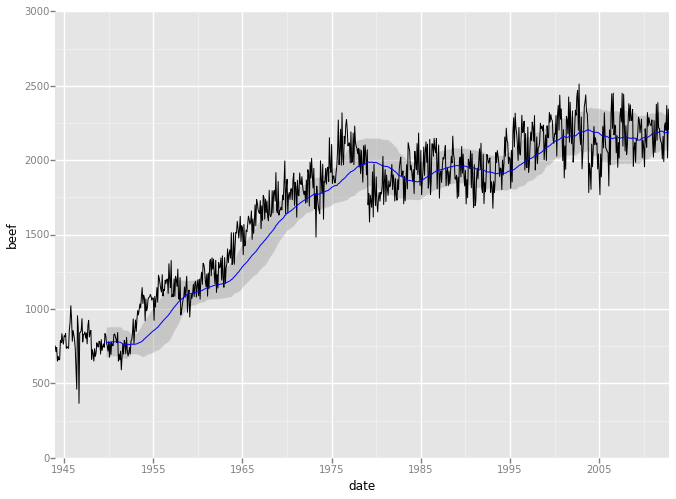

<ggplot: (296214725)>

In [31]:
# Moving average
ggplot(meat, aes(x='date', y='beef')) + geom_line() +\
    stat_smooth(color='blue', method="ma", window=70)

## Multiple (facet) plots

In [32]:
diamonds.clarity.unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'], dtype=object)

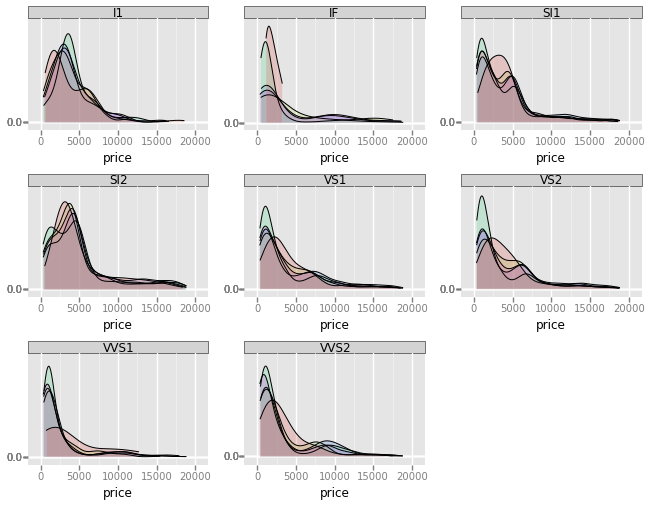

<ggplot: (294942185)>

In [33]:
ggplot(diamonds, aes(x='price', fill='cut')) +\
    geom_density(alpha=0.25) + facet_wrap("clarity")

In [34]:
diamonds.clarity.unique(), diamonds.cut.unique()

(array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'], dtype=object),
 array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object))

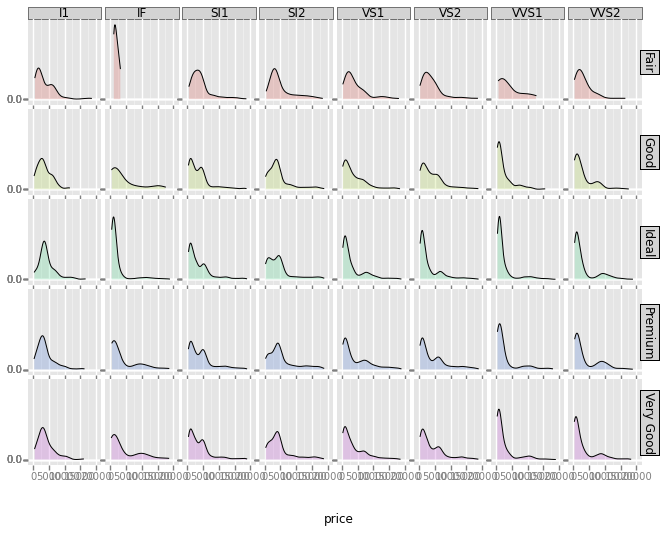

<ggplot: (296061637)>

In [35]:
ggplot(diamonds, aes(x='price', fill='cut')) +\
    geom_density(alpha=0.25) + facet_grid("cut", "clarity")

## Styling, plot title and axis transformations

In [36]:
# Plot styling
from ggplot.themes import *

In [37]:
# Applying 
from ggplot.scales import *

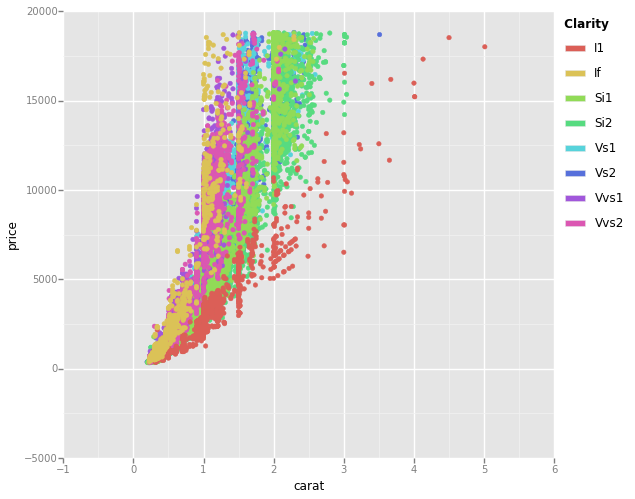

<ggplot: (289165449)>

In [38]:
ggplot(aes(x='carat', y='price', color='clarity'), data=diamonds) +\
    geom_point()

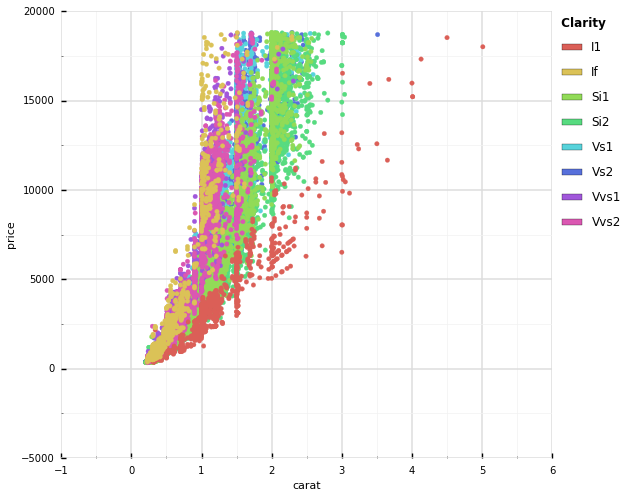

<ggplot: (299141425)>

In [39]:
ggplot(aes(x='carat', y='price', color='clarity'), data=diamonds) +\
    geom_point() + theme_seaborn()

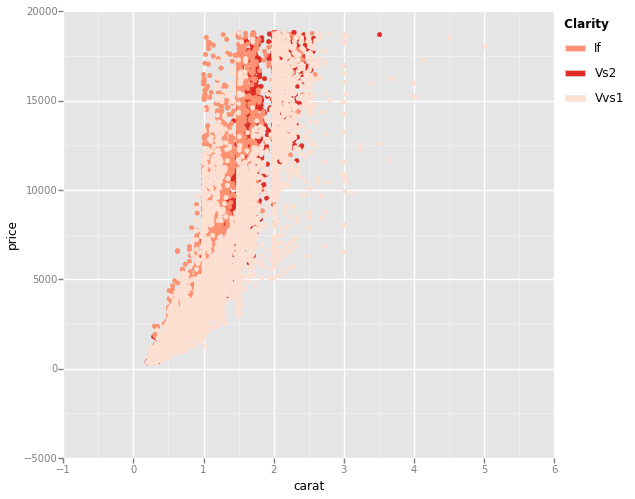

<ggplot: (301579353)>

In [40]:
# Use a sequential color palette. See also type='qual' for a qualitative cmap.
ggplot(aes(x='carat', y='price', color='clarity'), data=diamonds) +\
    geom_point() + scale_color_brewer(type='seq', palette='Reds')

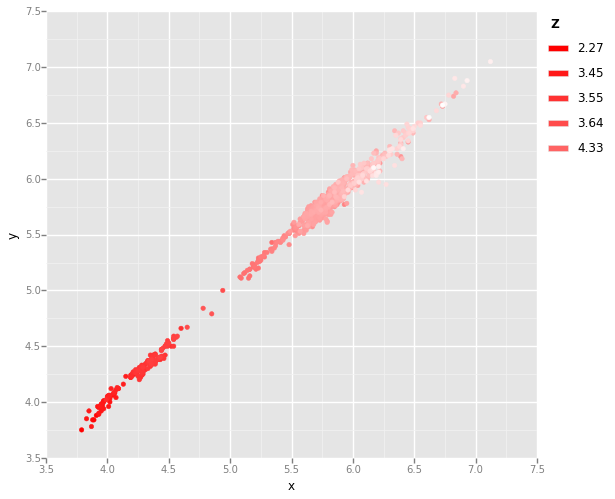

<ggplot: (301846105)>

In [41]:
ggplot(aes(x='x', y='y', color='z'), data=diamonds.head(1000)) +\
    geom_point() + scale_color_gradient(low='red', high='white')

In [42]:
from ggplot import ggtitle, xlim, ylim, scale_x_log, scale_y_log

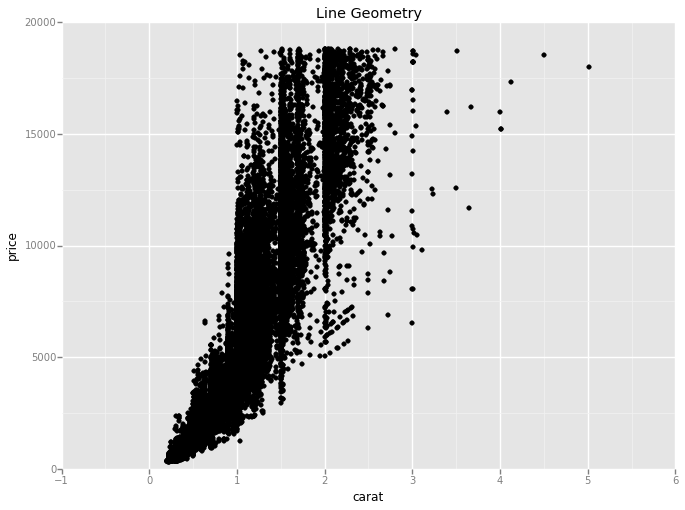

<ggplot: (301884129)>

In [43]:
# Control things around the plot: titles, ranges, log scales, ...
ggplot(aes(x='carat', y='price'), data=diamonds) +\
    geom_point() + ggtitle("Line Geometry") + ylim(0, None)

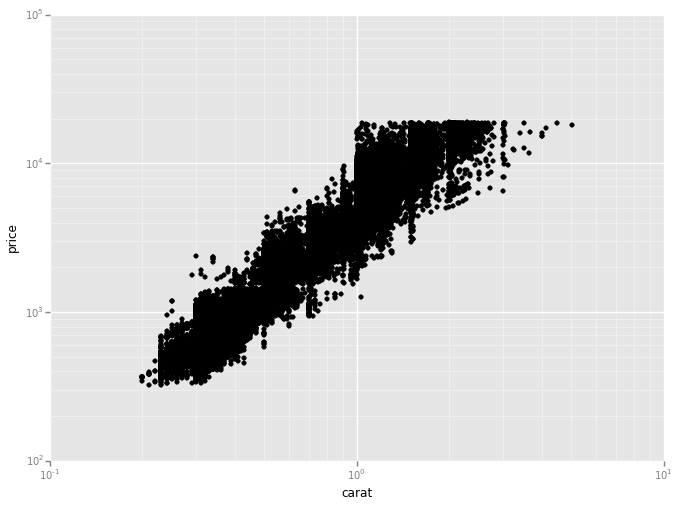

<ggplot: (296225221)>

In [44]:
ggplot(aes(x='carat', y='price'), data=diamonds) +\
    geom_point() + scale_x_log() + scale_y_log()

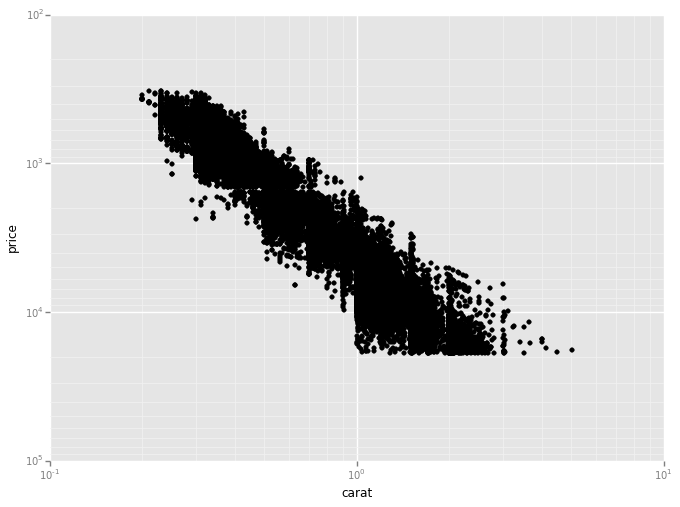

<ggplot: (289081301)>

In [45]:
ggplot(aes(x='carat', y='price'), data=diamonds) +\
    geom_point() + scale_x_log() + scale_y_log() + scale_y_reverse()